In [39]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key

In [40]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [41]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [42]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [43]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?"

#API URL
city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=imperial"

# Make a 'Get' request for the city weather.
weather_response = requests.get(city_url)

# Convert to json
weather_json = weather_response.json()

# API Test
weather_json.get("main")


In [44]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "q=" + cities[i] + "&appid=" + weather_api_key + "&units=imperial"
       
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port augusta
Processing Record 2 of Set 1 | brownsville
Processing Record 3 of Set 1 | chipinge
Processing Record 4 of Set 1 | vanavara
Processing Record 5 of Set 1 | marcona
City not found. Skipping...
Processing Record 6 of Set 1 | tecoanapa
Processing Record 7 of Set 1 | villa guerrero
Processing Record 8 of Set 1 | saint-joseph
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | zhigansk
Processing Record 11 of Set 1 | warmbad
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | berdigestyakh
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | natal
Processing Record 19 of Set 1 | nouadhibou
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | lana
Processing Record 22 of Set 1 |

Processing Record 34 of Set 4 | katsuura
Processing Record 35 of Set 4 | mayo
Processing Record 36 of Set 4 | van
Processing Record 37 of Set 4 | severo-kurilsk
Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | doctor pedro p. pena
City not found. Skipping...
Processing Record 40 of Set 4 | horki
Processing Record 41 of Set 4 | amapa
Processing Record 42 of Set 4 | lolua
City not found. Skipping...
Processing Record 43 of Set 4 | coffs harbour
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | tapes
Processing Record 46 of Set 4 | newberg
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | ayr
Processing Record 49 of Set 4 | port-cartier
Processing Record 50 of Set 4 | sagua la grande
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | poum
Processing Record 3 of Set 5 | zhanaozen
Processing Record 4 of Set 5 | cape town
Processing Record 5 of Set 5 | pyinmana
Processing Record 6 of Set 5 | alofi
Proc

Processing Record 26 of Set 8 | virgilio
Processing Record 27 of Set 8 | kushmurun
Processing Record 28 of Set 8 | belaya gora
Processing Record 29 of Set 8 | tura
Processing Record 30 of Set 8 | cockburn town
Processing Record 31 of Set 8 | bandarbeyla
Processing Record 32 of Set 8 | miles city
Processing Record 33 of Set 8 | waingapu
Processing Record 34 of Set 8 | cayenne
Processing Record 35 of Set 8 | vardo
Processing Record 36 of Set 8 | angarsk
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | libreville
Processing Record 39 of Set 8 | aberdeen
Processing Record 40 of Set 8 | labutta
City not found. Skipping...
Processing Record 41 of Set 8 | kahului
Processing Record 42 of Set 8 | luderitz
Processing Record 43 of Set 8 | jomalig
City not found. Skipping...
Processing Record 44 of Set 8 | rexburg
Processing Record 45 of Set 8 | warrnambool
Processing Record 46 of Set 8 | kitimat
Processing Record 47 of Set 8 | vestmannaeyjar
Processing Record 48 of Set 8 | 

Processing Record 15 of Set 12 | biak
Processing Record 16 of Set 12 | lompoc
Processing Record 17 of Set 12 | dawei
Processing Record 18 of Set 12 | kutum
Processing Record 19 of Set 12 | sabang
Processing Record 20 of Set 12 | buckeye
Processing Record 21 of Set 12 | kidal
Processing Record 22 of Set 12 | alyangula
Processing Record 23 of Set 12 | asfi
Processing Record 24 of Set 12 | lazaro cardenas
Processing Record 25 of Set 12 | amparafaravola
Processing Record 26 of Set 12 | port blair
Processing Record 27 of Set 12 | kampot
Processing Record 28 of Set 12 | payo
Processing Record 29 of Set 12 | merauke
Processing Record 30 of Set 12 | praia da vitoria
Processing Record 31 of Set 12 | hovd
Processing Record 32 of Set 12 | la ronge
Processing Record 33 of Set 12 | hailar
Processing Record 34 of Set 12 | muisne
Processing Record 35 of Set 12 | moron
Processing Record 36 of Set 12 | jizan
Processing Record 37 of Set 12 | banda aceh
Processing Record 38 of Set 12 | varzea da palma
Pr

In [45]:
len(city_data)

553

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Augusta,-32.5000,137.7667,51.71,67,44,7.99,AU,2021-07-23 15:27:15
1,Brownsville,25.9018,-97.4975,87.91,79,75,5.01,US,2021-07-23 15:27:16
2,Chipinge,-20.1883,32.6236,59.74,41,24,8.99,ZW,2021-07-23 15:27:16
3,Vanavara,60.3400,102.2797,61.81,74,60,3.04,RU,2021-07-23 15:27:16
4,Tecoanapa,16.5167,-98.7500,81.45,74,68,3.02,MX,2021-07-23 15:27:16
5,Villa Guerrero,18.8667,-99.6500,67.62,57,2,2.89,MX,2021-07-23 15:27:17
6,Saint-Joseph,-21.3667,55.6167,70.18,71,43,2.95,RE,2021-07-23 15:27:17
7,Ushuaia,-54.8000,-68.3000,40.62,81,40,14.97,AR,2021-07-23 15:27:17
8,Zhigansk,66.7697,123.3711,60.51,69,43,3.87,RU,2021-07-23 15:27:17
9,Warmbad,-28.4500,18.7333,58.55,15,0,17.52,NA,2021-07-23 15:27:18


In [47]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Augusta,AU,2021-07-23 15:27:15,-32.5000,137.7667,51.71,67,44,7.99
1,Brownsville,US,2021-07-23 15:27:16,25.9018,-97.4975,87.91,79,75,5.01
2,Chipinge,ZW,2021-07-23 15:27:16,-20.1883,32.6236,59.74,41,24,8.99
3,Vanavara,RU,2021-07-23 15:27:16,60.3400,102.2797,61.81,74,60,3.04
4,Tecoanapa,MX,2021-07-23 15:27:16,16.5167,-98.7500,81.45,74,68,3.02
...,...,...,...,...,...,...,...,...,...
548,Gilbues,BR,2021-07-23 15:29:27,-9.8317,-45.3439,86.70,32,57,12.10
549,Sobolevo,RU,2021-07-23 15:29:28,54.4299,31.8996,68.23,74,52,11.99
550,Ibipeba,BR,2021-07-23 15:29:28,-11.6408,-42.0111,79.56,39,58,14.65
551,Milan,IT,2021-07-23 15:28:20,45.4643,9.1895,92.05,52,0,4.61


In [48]:
# Create the output file (CSV).
output_data_file = "../World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

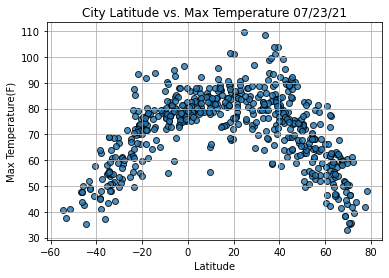

In [55]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/ Fig1.png")

# Show plot.
plt.show()




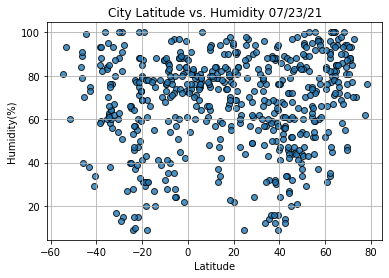

In [56]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/ Fig2.png")

# Show plot.
plt.show()


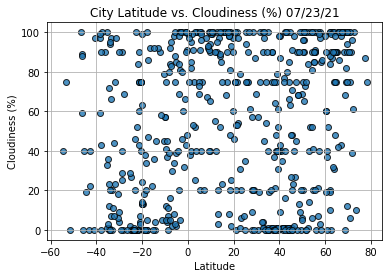

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig3.png")

# Show plot.
plt.show()

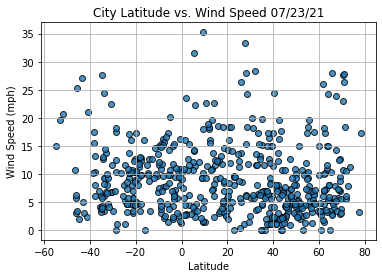

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig4.png")

# Show plot.
plt.show()